# Phase 4.5: Ablation Studies

**Prerequisites:** Run `train_lora_adapters.ipynb` first to create real LoRA adapters and deltas.

This notebook compares different training configurations:
1. **Multi-task** (λ_w=1.0, λ_d=0.1) - Both weight and delta supervision
2. **Multi-task balanced** (λ_w=0.5, λ_d=0.5) - Equal weight/delta supervision
3. **Delta-only** (λ_w=0.0, λ_d=1.0) - Behavioral supervision only
4. **Weight-only** (λ_w=1.0, λ_d=0.0) - Traditional DnD baseline

Each configuration runs 3 trials with different seeds for statistical significance.

## Configuration

In [1]:
import sys
import os

# Colab setup
IN_COLAB = 'google.colab' in sys.modules
DRIVE_OUTPUT_DIR = None

if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    DRIVE_OUTPUT_DIR = '/content/drive/MyDrive/llgbm/outputs'
    os.makedirs(DRIVE_OUTPUT_DIR, exist_ok=True)
    sys.path.insert(0, '/content/drive/MyDrive')
    CHECKPOINT_DIR = '/content/drive/MyDrive/llgbm/checkpoints'
    DELTAS_DIR = CHECKPOINT_DIR + '/deltas'
else:
    CHECKPOINT_DIR = './checkpoints'
    DELTAS_DIR = './llgbm/deltas'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from llgbm import AblationConfig, run_ablations, plot_ablation_results

print("[OK] llgbm imports")

[OK] llgbm imports


In [3]:
# Experiment configuration - modify these parameters as needed
config = AblationConfig(
    # Ablation configurations to compare
    configs={
        "multitask": {"lambda_weight": 1.0, "lambda_delta": 0.1},
        "multitask2": {"lambda_weight": 0.5, "lambda_delta": 0.5},
        "delta_only": {"lambda_weight": 0.0, "lambda_delta": 1.0},
        "weight_only": {"lambda_weight": 1.0, "lambda_delta": 0.0},
    },

    # Trial settings
    num_trials=3,
    seeds=[42, 123, 456],
    num_steps=100,

    # Paths
    checkpoint_dir=CHECKPOINT_DIR,
    deltas_dir=DELTAS_DIR,
    output_dir="outputs/phase4_5_ablations",

    # Model settings
    use_small_model=False,  # Qwen2.5-1.5B
    batch_size=1,
    gradient_accumulation_steps=4,
    warmup_steps=25,
    learning_rate=1e-4,

    # Colab settings
    in_colab=IN_COLAB,
    drive_output_dir=DRIVE_OUTPUT_DIR,
)

print(f"Configurations: {list(config.configs.keys())}")
print(f"Total runs: {len(config.configs) * config.num_trials}")

Configurations: ['multitask', 'multitask2', 'delta_only', 'weight_only']
Total runs: 12


## Run Ablations

In [4]:
# Run all ablation experiments
results = run_ablations(config)

Configurations: ['multitask', 'multitask2', 'delta_only', 'weight_only']
Trials per config: 3
Steps per trial: 100
Total runs: 12
Model: Qwen/Qwen2.5-1.5B
Device: cuda


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/138 [00:00<?, ?B/s]

[OK] Base model loaded
  Loaded 10 probes for arc_e
  Loaded 10 probes for boolq
  Loaded 10 probes for gsm8k
[OK] Probes: 30, FunctionalLoRA ready


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

[OK] Dataset: 15 samples

Config: multitask | Trial 1 | Seed: 42
lambda_w=1.0, lambda_d=0.1
  Generator params: 43,325,064


Training:   0%|          | 0/100 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/15 [00:00<?, ?it/s]

Result: loss=0.0001, mean_cosine=0.3871, time=450.9s

Config: multitask | Trial 2 | Seed: 123
lambda_w=1.0, lambda_d=0.1
  Generator params: 43,325,064


Training:   0%|          | 0/100 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/15 [00:00<?, ?it/s]

Result: loss=0.0001, mean_cosine=0.3820, time=410.2s

Config: multitask | Trial 3 | Seed: 456
lambda_w=1.0, lambda_d=0.1
  Generator params: 43,325,064


Training:   0%|          | 0/100 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/15 [00:00<?, ?it/s]

Result: loss=0.0001, mean_cosine=0.3840, time=410.1s

Config: multitask2 | Trial 1 | Seed: 42
lambda_w=0.5, lambda_d=0.5
  Generator params: 43,325,064


Training:   0%|          | 0/100 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/15 [00:00<?, ?it/s]

Result: loss=0.0004, mean_cosine=0.4338, time=410.2s

Config: multitask2 | Trial 2 | Seed: 123
lambda_w=0.5, lambda_d=0.5
  Generator params: 43,325,064


Training:   0%|          | 0/100 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/15 [00:00<?, ?it/s]

Result: loss=0.0004, mean_cosine=0.4447, time=410.7s

Config: multitask2 | Trial 3 | Seed: 456
lambda_w=0.5, lambda_d=0.5
  Generator params: 43,325,064


Training:   0%|          | 0/100 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/15 [00:00<?, ?it/s]

Result: loss=0.0004, mean_cosine=0.4369, time=410.1s

Config: delta_only | Trial 1 | Seed: 42
lambda_w=0.0, lambda_d=1.0
  Generator params: 43,325,064


Training:   0%|          | 0/100 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/15 [00:00<?, ?it/s]

Result: loss=0.0007, mean_cosine=0.4433, time=408.4s

Config: delta_only | Trial 2 | Seed: 123
lambda_w=0.0, lambda_d=1.0
  Generator params: 43,325,064


Training:   0%|          | 0/100 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/15 [00:00<?, ?it/s]

Result: loss=0.0007, mean_cosine=0.4461, time=408.5s

Config: delta_only | Trial 3 | Seed: 456
lambda_w=0.0, lambda_d=1.0
  Generator params: 43,325,064


Training:   0%|          | 0/100 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/15 [00:00<?, ?it/s]

Result: loss=0.0007, mean_cosine=0.4511, time=408.6s

Config: weight_only | Trial 1 | Seed: 42
lambda_w=1.0, lambda_d=0.0
  Generator params: 43,325,064


Training:   0%|          | 0/100 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/15 [00:00<?, ?it/s]

Result: loss=0.0000, mean_cosine=-0.0142, time=405.5s

Config: weight_only | Trial 2 | Seed: 123
lambda_w=1.0, lambda_d=0.0
  Generator params: 43,325,064


Training:   0%|          | 0/100 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/15 [00:00<?, ?it/s]

Result: loss=0.0000, mean_cosine=0.0131, time=405.7s

Config: weight_only | Trial 3 | Seed: 456
lambda_w=1.0, lambda_d=0.0
  Generator params: 43,325,064


Training:   0%|          | 0/100 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/15 [00:00<?, ?it/s]

Result: loss=0.0000, mean_cosine=-0.0238, time=405.7s


Completed 12 trials!

Saved to outputs/phase4_5_ablations/


## Results Summary

In [5]:
import pandas as pd

df = results["dataframe"]

# Aggregate by config
agg_dict = {
    "final_loss": ["mean", "std"],
    "best_loss": ["mean", "std"],
    "train_time": ["mean"],
}
if "mean_cosine" in df.columns:
    agg_dict["mean_cosine"] = ["mean", "std"]

summary = df.groupby("config_name").agg(agg_dict).round(4)

print("\n" + "="*70)
print("ABLATION SUMMARY (mean +/- std over 3 trials)")
print("="*70)
print(summary.to_string())


ABLATION SUMMARY (mean +/- std over 3 trials)
            final_loss      best_loss      train_time mean_cosine        
                  mean  std      mean  std       mean        mean     std
config_name                                                              
delta_only      0.0007  0.0    0.0007  0.0   408.5288      0.4468  0.0039
multitask       0.0001  0.0    0.0001  0.0   423.7753      0.3844  0.0026
multitask2      0.0004  0.0    0.0003  0.0   410.3297      0.4384  0.0056
weight_only     0.0000  0.0    0.0000  0.0   405.6332     -0.0083  0.0191


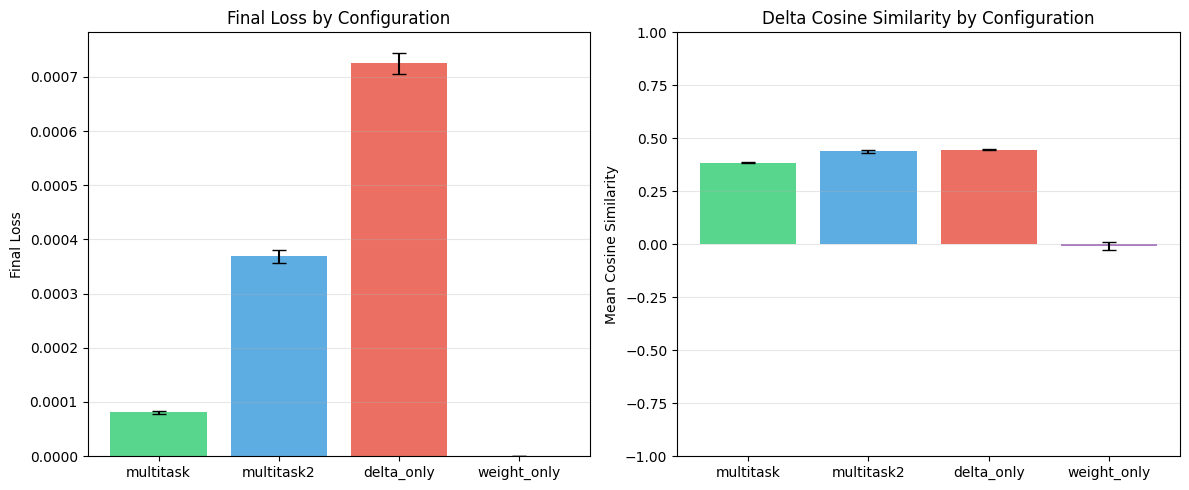

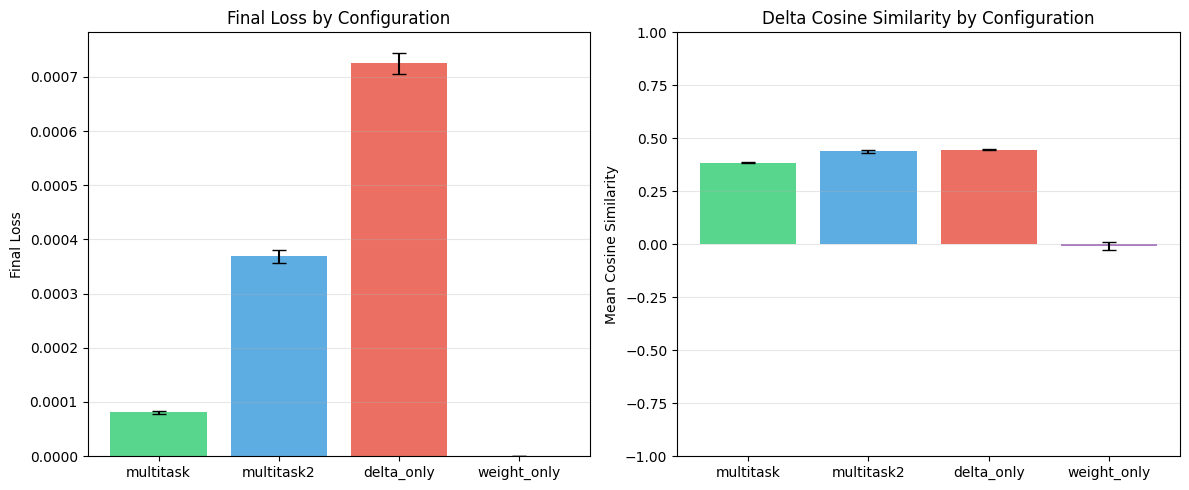

In [6]:
# Visualization
from pathlib import Path
plot_ablation_results(df, Path(config.output_dir), list(config.configs.keys()))

In [7]:
# Sync to Drive if in Colab
if IN_COLAB and DRIVE_OUTPUT_DIR:
    import shutil
    drive_dir = f"{DRIVE_OUTPUT_DIR}/phase4_5_ablations"
    if os.path.exists(drive_dir):
        shutil.rmtree(drive_dir)
    shutil.copytree(str(config.output_dir), drive_dir)
    print(f"[Drive] Synced to {drive_dir}")
else:
    print("[Local] Outputs saved to", config.output_dir)

[Drive] Synced to /content/drive/MyDrive/llgbm/outputs/phase4_5_ablations


In [8]:
# Final summary
print("\n" + "="*70)
print("Phase 4.5 Ablations Complete!")
print("="*70)

print(f"\nKey findings (loss | cosine):")
for config_name in config.configs.keys():
    mean_loss = df[df['config_name']==config_name]['final_loss'].mean()
    std_loss = df[df['config_name']==config_name]['final_loss'].std()

    if 'mean_cosine' in df.columns:
        mean_cos = df[df['config_name']==config_name]['mean_cosine'].mean()
        std_cos = df[df['config_name']==config_name]['mean_cosine'].std()
        print(f"  {config_name:12s}: {mean_loss:.4f} +/- {std_loss:.4f} | {mean_cos:.4f} +/- {std_cos:.4f}")
    else:
        print(f"  {config_name:12s}: {mean_loss:.4f} +/- {std_loss:.4f}")

print(f"\nOutputs saved to: {config.output_dir}")


Phase 4.5 Ablations Complete!

Key findings (loss | cosine):
  multitask   : 0.0001 +/- 0.0000 | 0.3844 +/- 0.0026
  multitask2  : 0.0004 +/- 0.0000 | 0.4384 +/- 0.0056
  delta_only  : 0.0007 +/- 0.0000 | 0.4468 +/- 0.0039
  weight_only : 0.0000 +/- 0.0000 | -0.0083 +/- 0.0191

Outputs saved to: outputs/phase4_5_ablations


## Task Performance Evaluation (Optional)

Evaluate generated LoRAs using **eval loss** on held-out task data.

In [4]:
from llgbm import (
    compute_base_eval_loss,
    compute_accuracy_with_lora_batched,
    create_generator,
    load_checkpoint,
    TrainingConfig,
    FunctionalLoRA,
    RealAdapterDataset,
)
from transformers import AutoModelForCausalLM, AutoTokenizer
import json
import torch
from pathlib import Path

# Configuration
CONFIGS_TO_EVAL = ["delta_only", "multitask", "weight_only"]
NUM_TRIALS = 3
task_types = {"arc_e": "mcq", "boolq": "bool", "gsm8k": "gsm8k"}

# Load base model and tokenizer
base_config = TrainingConfig(use_small_model=False)  # Qwen2.5-1.5B
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"[1] Loading base model: {base_config.base_model}")
base_model = AutoModelForCausalLM.from_pretrained(
    base_config.base_model,
    torch_dtype=torch.bfloat16,
    device_map=device,
    trust_remote_code=True,
)
base_model.eval()
tokenizer = AutoTokenizer.from_pretrained(base_config.base_model, trust_remote_code=True)
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# Load dataset for conditioning
print("[2] Loading dataset")
text_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
dataset = RealAdapterDataset(CHECKPOINT_DIR, DELTAS_DIR, text_tokenizer, base_config)
print(f"    {len(dataset)} samples")

# Create FunctionalLoRA wrapper
functional_lora = FunctionalLoRA(
    base_model,
    lora_rank=base_config.lora_rank,
    lora_alpha=base_config.lora_alpha,
)

# Load eval data
print("[3] Loading eval data")
eval_splits_dir = Path('/content/drive/MyDrive/llgbm/data')
eval_data = {}
for task in ["arc_e", "boolq", "gsm8k"]:
    eval_file = eval_splits_dir / f"{task}_eval.json"
    if eval_file.exists():
        with open(eval_file) as f:
            eval_data[task] = json.load(f)
        print(f"    {task}: {len(eval_data[task])} samples")

# Evaluate base model first
print("\n" + "="*60)
print("BASE MODEL (no LoRA)")
print("="*60)
for task, samples in eval_data.items():
    loss = compute_base_eval_loss(base_model, samples, tokenizer)
    print(f"  {task}: loss={loss:.4f}")

# Collect all results
all_results = []

# Evaluate each config and trial
for config_name in CONFIGS_TO_EVAL:
    for trial in range(NUM_TRIALS):
        checkpoint_path = Path(f"outputs/phase4_5_ablations/{config_name}_trial{trial}/checkpoint_final.pt")
        if not checkpoint_path.exists():
            continue

        print(f"\n" + "="*60)
        print(f"{config_name.upper()} TRIAL {trial}")
        print("="*60)

        # Load generator
        generator = create_generator(base_config, seed=42, device=device)
        load_checkpoint(str(checkpoint_path), generator)
        generator.eval()

        trial_results = {"config": config_name, "trial": trial}

        for task, samples in eval_data.items():
            task_indices = [i for i, s in enumerate(dataset.samples) if s["task"] == task]
            if not task_indices:
                print(f"  {task}: [SKIP]")
                continue

            sample = dataset[task_indices[0]]
            condition_ids = sample["condition_ids"].long()
            attention_mask = sample["attention_mask"].float()

            result = compute_accuracy_with_lora_batched(
                generator=generator,
                functional_lora=functional_lora,
                condition_ids=condition_ids,
                attention_mask=attention_mask,
                eval_samples=samples,
                tokenizer=tokenizer,
                task_type=task_types[task],
                max_samples=100,
                batch_size=8,  # Reduced for 1.5B model
                device=device,
            )
            trial_results[task] = result["accuracy"]
            print(f"  {task}: {result['accuracy']:.2%} ({result['correct']}/{result['total']})")

        all_results.append(trial_results)
        del generator
        torch.cuda.empty_cache()

# Summary table
print("\n" + "="*60)
print("SUMMARY")
print("="*60)
import pandas as pd
if all_results:
    df_eval = pd.DataFrame(all_results)
    summary = df_eval.groupby("config")[["arc_e", "boolq", "gsm8k"]].agg(["mean", "std"])
    print(summary.round(4).to_string())

[1] Loading base model: Qwen/Qwen2.5-1.5B


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
`torch_dtype` is deprecated! Use `dtype` instead!


[2] Loading dataset
    15 samples
[3] Loading eval data
    arc_e: 2376 samples
    boolq: 3270 samples
    gsm8k: 1319 samples

BASE MODEL (no LoRA)
  arc_e: loss=4.2455
  boolq: loss=4.7453
  gsm8k: loss=1.8243

DELTA_ONLY TRIAL 0
  Generator params: 43,325,064


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/transformer.py:515: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. We recommend specifying layout=torch.jagged when constructing a nested tensor, as this layout receives active development, has better operator coverage, and works with torch.compile. (Triggered internally at /pytorch/aten/src/ATen/NestedTensorImpl.cpp:178.)
  output = torch._nested_tensor_from_mask(
Evaluating batches: 100%|██████████| 13/13 [02:07<00:00,  9.81s/it, acc=23.00%]


  [INFO] Parse failures: 10/100 (10.0%)
  arc_e: 23.00% (23/100)


Evaluating batches: 100%|██████████| 13/13 [01:22<00:00,  6.34s/it, acc=69.00%]


  [INFO] Parse failures: 1/100 (1.0%)
  boolq: 69.00% (69/100)


Evaluating batches: 100%|██████████| 13/13 [01:37<00:00,  7.49s/it, acc=1.00%]


  [INFO] Parse failures: 77/100 (77.0%)
  gsm8k: 1.00% (1/100)

DELTA_ONLY TRIAL 1
  Generator params: 43,325,064


Evaluating batches: 100%|██████████| 13/13 [02:07<00:00,  9.83s/it, acc=23.00%]


  [INFO] Parse failures: 10/100 (10.0%)
  arc_e: 23.00% (23/100)


Evaluating batches: 100%|██████████| 13/13 [01:22<00:00,  6.34s/it, acc=69.00%]


  [INFO] Parse failures: 1/100 (1.0%)
  boolq: 69.00% (69/100)


Evaluating batches: 100%|██████████| 13/13 [01:37<00:00,  7.49s/it, acc=1.00%]


  [INFO] Parse failures: 73/100 (73.0%)
  gsm8k: 1.00% (1/100)

DELTA_ONLY TRIAL 2
  Generator params: 43,325,064


Evaluating batches: 100%|██████████| 13/13 [02:07<00:00,  9.82s/it, acc=23.00%]


  [INFO] Parse failures: 10/100 (10.0%)
  arc_e: 23.00% (23/100)


Evaluating batches: 100%|██████████| 13/13 [01:22<00:00,  6.34s/it, acc=69.00%]


  [INFO] Parse failures: 1/100 (1.0%)
  boolq: 69.00% (69/100)


Evaluating batches: 100%|██████████| 13/13 [01:37<00:00,  7.50s/it, acc=2.00%]


  [INFO] Parse failures: 77/100 (77.0%)
  gsm8k: 2.00% (2/100)

MULTITASK TRIAL 0
  Generator params: 43,325,064


Evaluating batches: 100%|██████████| 13/13 [02:08<00:00,  9.85s/it, acc=23.00%]


  [INFO] Parse failures: 10/100 (10.0%)
  arc_e: 23.00% (23/100)


Evaluating batches: 100%|██████████| 13/13 [01:22<00:00,  6.33s/it, acc=69.00%]


  [INFO] Parse failures: 1/100 (1.0%)
  boolq: 69.00% (69/100)


Evaluating batches: 100%|██████████| 13/13 [01:37<00:00,  7.49s/it, acc=2.00%]


  [INFO] Parse failures: 74/100 (74.0%)
  gsm8k: 2.00% (2/100)

MULTITASK TRIAL 1
  Generator params: 43,325,064


Evaluating batches: 100%|██████████| 13/13 [02:07<00:00,  9.83s/it, acc=23.00%]


  [INFO] Parse failures: 10/100 (10.0%)
  arc_e: 23.00% (23/100)


Evaluating batches: 100%|██████████| 13/13 [01:22<00:00,  6.33s/it, acc=69.00%]


  [INFO] Parse failures: 1/100 (1.0%)
  boolq: 69.00% (69/100)


Evaluating batches: 100%|██████████| 13/13 [01:37<00:00,  7.50s/it, acc=1.00%]


  [INFO] Parse failures: 76/100 (76.0%)
  gsm8k: 1.00% (1/100)

MULTITASK TRIAL 2
  Generator params: 43,325,064


Evaluating batches: 100%|██████████| 13/13 [02:07<00:00,  9.83s/it, acc=23.00%]


  [INFO] Parse failures: 10/100 (10.0%)
  arc_e: 23.00% (23/100)


Evaluating batches: 100%|██████████| 13/13 [01:22<00:00,  6.35s/it, acc=69.00%]


  [INFO] Parse failures: 1/100 (1.0%)
  boolq: 69.00% (69/100)


Evaluating batches: 100%|██████████| 13/13 [01:37<00:00,  7.50s/it, acc=1.00%]


  [INFO] Parse failures: 75/100 (75.0%)
  gsm8k: 1.00% (1/100)

WEIGHT_ONLY TRIAL 0
  Generator params: 43,325,064


Evaluating batches: 100%|██████████| 13/13 [02:08<00:00,  9.86s/it, acc=23.00%]


  [INFO] Parse failures: 11/100 (11.0%)
  arc_e: 23.00% (23/100)


Evaluating batches: 100%|██████████| 13/13 [01:22<00:00,  6.34s/it, acc=69.00%]


  [INFO] Parse failures: 1/100 (1.0%)
  boolq: 69.00% (69/100)


Evaluating batches: 100%|██████████| 13/13 [01:37<00:00,  7.50s/it, acc=1.00%]


  [INFO] Parse failures: 74/100 (74.0%)
  gsm8k: 1.00% (1/100)

WEIGHT_ONLY TRIAL 1
  Generator params: 43,325,064


Evaluating batches: 100%|██████████| 13/13 [02:07<00:00,  9.84s/it, acc=23.00%]


  [INFO] Parse failures: 10/100 (10.0%)
  arc_e: 23.00% (23/100)


Evaluating batches: 100%|██████████| 13/13 [01:22<00:00,  6.34s/it, acc=69.00%]


  [INFO] Parse failures: 1/100 (1.0%)
  boolq: 69.00% (69/100)


Evaluating batches: 100%|██████████| 13/13 [01:37<00:00,  7.50s/it, acc=1.00%]


  [INFO] Parse failures: 75/100 (75.0%)
  gsm8k: 1.00% (1/100)

WEIGHT_ONLY TRIAL 2
  Generator params: 43,325,064


Evaluating batches: 100%|██████████| 13/13 [02:07<00:00,  9.83s/it, acc=23.00%]


  [INFO] Parse failures: 11/100 (11.0%)
  arc_e: 23.00% (23/100)


Evaluating batches: 100%|██████████| 13/13 [01:22<00:00,  6.34s/it, acc=69.00%]


  [INFO] Parse failures: 1/100 (1.0%)
  boolq: 69.00% (69/100)


Evaluating batches: 100%|██████████| 13/13 [01:37<00:00,  7.50s/it, acc=2.00%]

  [INFO] Parse failures: 74/100 (74.0%)
  gsm8k: 2.00% (2/100)

SUMMARY
            arc_e      boolq        gsm8k        
             mean  std  mean  std    mean     std
config                                           
delta_only   0.23  0.0  0.69  0.0  0.0133  0.0058
multitask    0.23  0.0  0.69  0.0  0.0133  0.0058
weight_only  0.23  0.0  0.69  0.0  0.0133  0.0058


## Generator Stability Analysis

Evaluate how consistent the generator is when conditioned on different samples from the same task.

In [5]:
import numpy as np

def evaluate_stability(generator, functional_lora, dataset, eval_samples,
                       tokenizer, task_name, task_type, num_conditions=5, device="cuda"):
    """Evaluate accuracy using different conditioning samples from the same task."""
    generator.eval()

    # Find all samples for this task
    task_indices = [i for i, s in enumerate(dataset.samples) if s["task"] == task_name]
    if len(task_indices) < num_conditions:
        num_conditions = len(task_indices)

    # Sample random conditioning inputs
    selected_indices = torch.randperm(len(task_indices))[:num_conditions].tolist()

    accuracies = []
    for i, sel_idx in enumerate(selected_indices):
        sample = dataset[task_indices[sel_idx]]

        result = compute_accuracy_with_lora_batched(
            generator=generator,
            functional_lora=functional_lora,
            condition_ids=sample["condition_ids"].long(),
            attention_mask=sample["attention_mask"].float(),
            eval_samples=eval_samples,
            tokenizer=tokenizer,
            task_type=task_type,
            max_samples=100,
            batch_size=8,
            device=device,
            show_progress=False,
        )
        accuracies.append(result["accuracy"])
        print(f"    Condition {i}: {result['accuracy']:.2%}")

    return {
        "mean": np.mean(accuracies),
        "std": np.std(accuracies),
        "min": min(accuracies),
        "max": max(accuracies),
        "all": accuracies,
    }

# Run stability analysis for each config (trial 0 only)
stability_results = []

for config_name in CONFIGS_TO_EVAL:
    checkpoint_path = Path(f"outputs/phase4_5_ablations/{config_name}_trial0/checkpoint_final.pt")
    if not checkpoint_path.exists():
        print(f"[SKIP] {config_name}: checkpoint not found")
        continue

    print(f"\n{'='*60}")
    print(f"{config_name.upper()} - STABILITY ANALYSIS")
    print(f"{'='*60}")

    generator = create_generator(base_config, seed=42, device=device)
    load_checkpoint(str(checkpoint_path), generator)
    generator.eval()

    config_results = {"config": config_name}

    for task in ["arc_e", "boolq"]:  # Skip gsm8k (slow + low accuracy)
        if task not in eval_data:
            continue
        print(f"\n  [{task}] Testing with 5 different conditions:")
        stats = evaluate_stability(
            generator, functional_lora, dataset, eval_data[task],
            tokenizer, task, task_types[task], num_conditions=5, device=device
        )
        print(f"  -> Mean: {stats['mean']:.2%} +/- {stats['std']:.2%} (range: {stats['min']:.2%} - {stats['max']:.2%})")

        config_results[f"{task}_mean"] = stats["mean"]
        config_results[f"{task}_std"] = stats["std"]

    stability_results.append(config_results)
    del generator
    torch.cuda.empty_cache()

# Summary
print("\n" + "="*60)
print("STABILITY SUMMARY")
print("="*60)
if stability_results:
    df_stab = pd.DataFrame(stability_results)
    print(df_stab.to_string(index=False))
    print("\nInterpretation:")
    print("  - Low std = stable generator (same LoRA regardless of condition)")
    print("  - High std = sensitive generator (different LoRAs per condition)")


DELTA_ONLY - STABILITY ANALYSIS
  Generator params: 43,325,064

  [arc_e] Testing with 5 different conditions:
    Condition 0: 23.00%
    Condition 1: 23.00%
    Condition 2: 23.00%
    Condition 3: 24.00%
    Condition 4: 23.00%
  -> Mean: 23.20% +/- 0.40% (range: 23.00% - 24.00%)

  [boolq] Testing with 5 different conditions:
    Condition 0: 69.00%
    Condition 1: 69.00%
    Condition 2: 69.00%
    Condition 3: 69.00%
    Condition 4: 69.00%
  -> Mean: 69.00% +/- 0.00% (range: 69.00% - 69.00%)

MULTITASK - STABILITY ANALYSIS
  Generator params: 43,325,064

  [arc_e] Testing with 5 different conditions:
    Condition 0: 23.00%
    Condition 1: 23.00%
    Condition 2: 23.00%
    Condition 3: 23.00%
    Condition 4: 23.00%
  -> Mean: 23.00% +/- 0.00% (range: 23.00% - 23.00%)

  [boolq] Testing with 5 different conditions:
    Condition 0: 69.00%
    Condition 1: 69.00%
    Condition 2: 69.00%
    Condition 3: 69.00%
    Condition 4: 69.00%
  -> Mean: 69.00% +/- 0.00% (range: 69.00%